In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Импортируем всё, что нужно

In [2]:
df = pd.read_csv("archive/all_v2.csv") 
df.head() # Посмотрим, что лежит внутри

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1


In [3]:
df.info(True, show_counts = True ) # Все Not-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   price          5477006 non-null  int64  
 1   date           5477006 non-null  object 
 2   time           5477006 non-null  object 
 3   geo_lat        5477006 non-null  float64
 4   geo_lon        5477006 non-null  float64
 5   region         5477006 non-null  int64  
 6   building_type  5477006 non-null  int64  
 7   level          5477006 non-null  int64  
 8   levels         5477006 non-null  int64  
 9   rooms          5477006 non-null  int64  
 10  area           5477006 non-null  float64
 11  kitchen_area   5477006 non-null  float64
 12  object_type    5477006 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


In [4]:
df.describe()  # посмотрим на описательные статистики

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06
mean,4.422029e+06,5.403826e+01,5.324433e+01,4.307141e+03,1.948966e+00,6.214530e+00,1.139892e+01,1.726173e+00,5.391825e+01,1.062840e+01,3.945399e+00
std,2.150752e+07,4.622758e+00,2.074763e+01,3.308050e+03,1.038537e+00,4.957419e+00,6.535734e+00,1.082133e+00,3.335293e+01,9.792380e+00,4.558357e+00
min,-2.144967e+09,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,7.000000e-02,1.000000e-02,1.000000e+00
25%,1.950000e+06,5.337768e+01,3.777790e+01,2.661000e+03,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,3.800000e+01,7.000000e+00,1.000000e+00
50%,2.990000e+06,5.517139e+01,4.306774e+01,2.922000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.802000e+01,9.700000e+00,1.000000e+00
75%,4.802000e+06,5.622613e+01,6.564895e+01,6.171000e+03,3.000000e+00,9.000000e+00,1.600000e+01,2.000000e+00,6.313000e+01,1.270000e+01,1.100000e+01
max,2.147484e+09,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,1.000000e+01,7.856000e+03,9.999000e+03,1.100000e+01


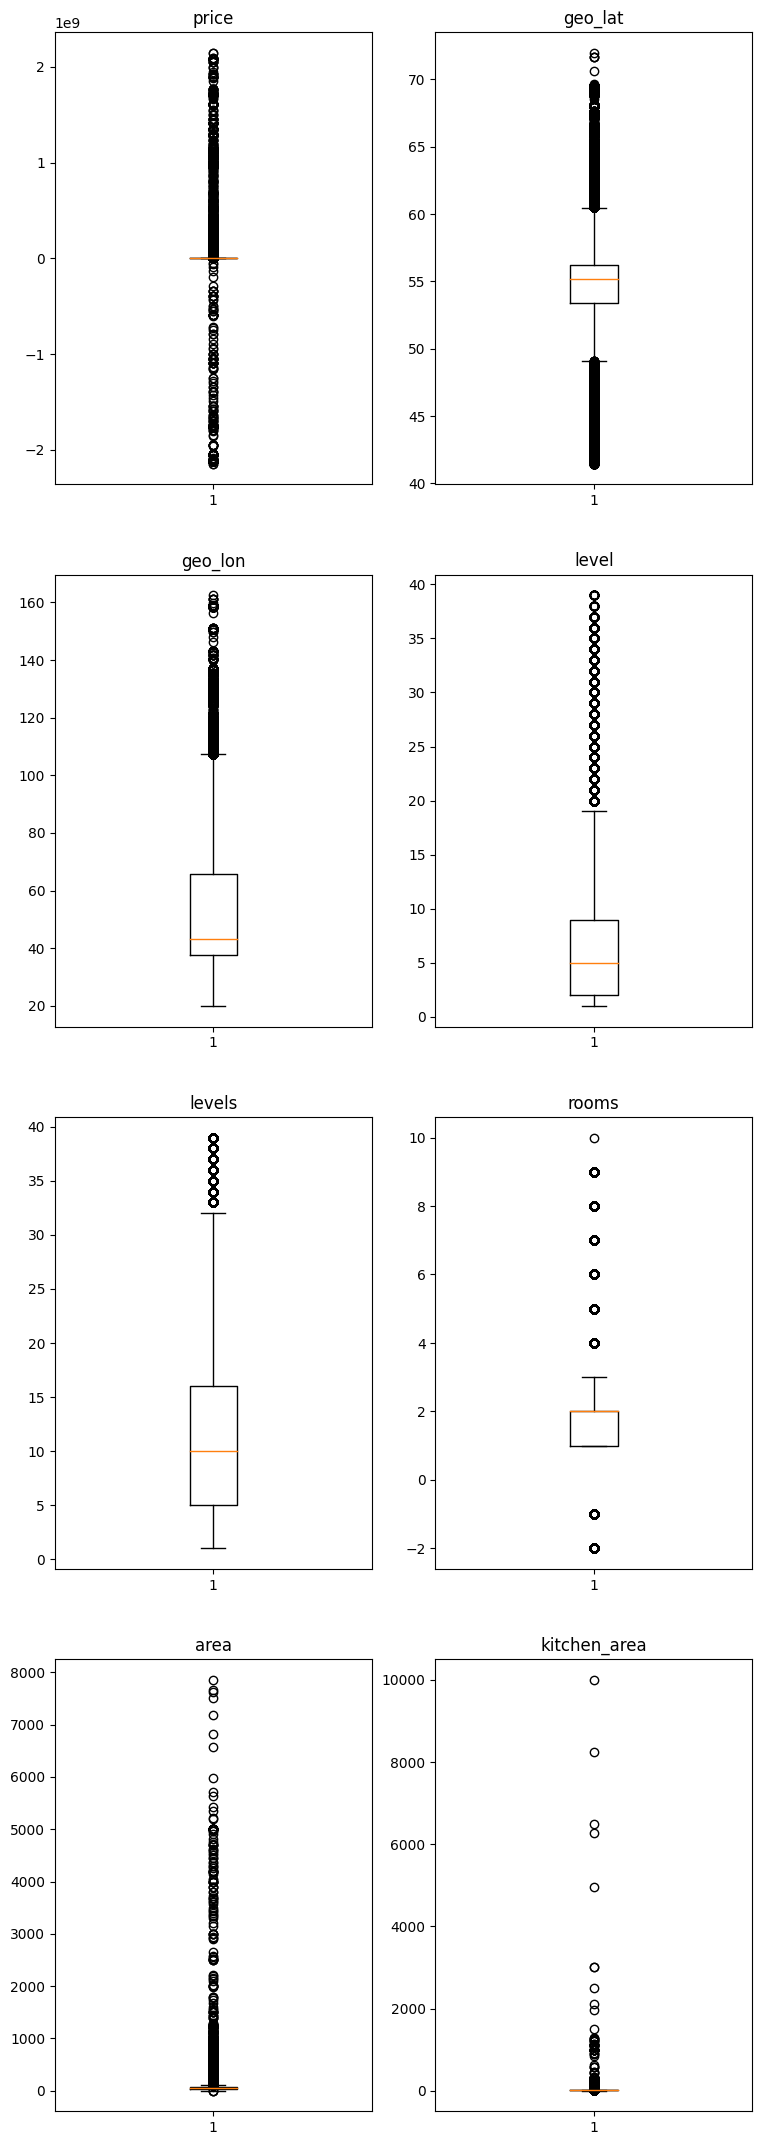

In [5]:
countable_cols = ["price", "geo_lat", "geo_lon", "level", "levels", "rooms", "area", "kitchen_area"] # рассмотрим все значимые числовые столбцы
fig, axs = plt.subplots(nrows=4, ncols=2, figsize = (9,27))
for n, col in enumerate(df[countable_cols].columns):
    axs[n//2, n%2].boxplot(df[col])
    axs[n//2, n%2].set_title(col)
plt.show()

Отрицательные значения цены и количества комнат, а так же колоссальные размеры квартир и комнат - выбросы

In [6]:
ddf = df["area"]
print(ddf[ddf > 400].count())
print(ddf[ddf > 300].count())
print(ddf[ddf > 250].count())
print(ddf[ddf > 200].count())
print(ddf[ddf > 100].count())
# Разница между [ddf > 200] и [ddf > 250] ~~ [ddf > 250] и [ddf > 300]. Причем 250 кв. м. - адекватная верхняя граница площади квартиры

2344
4897
7740
14121
196421


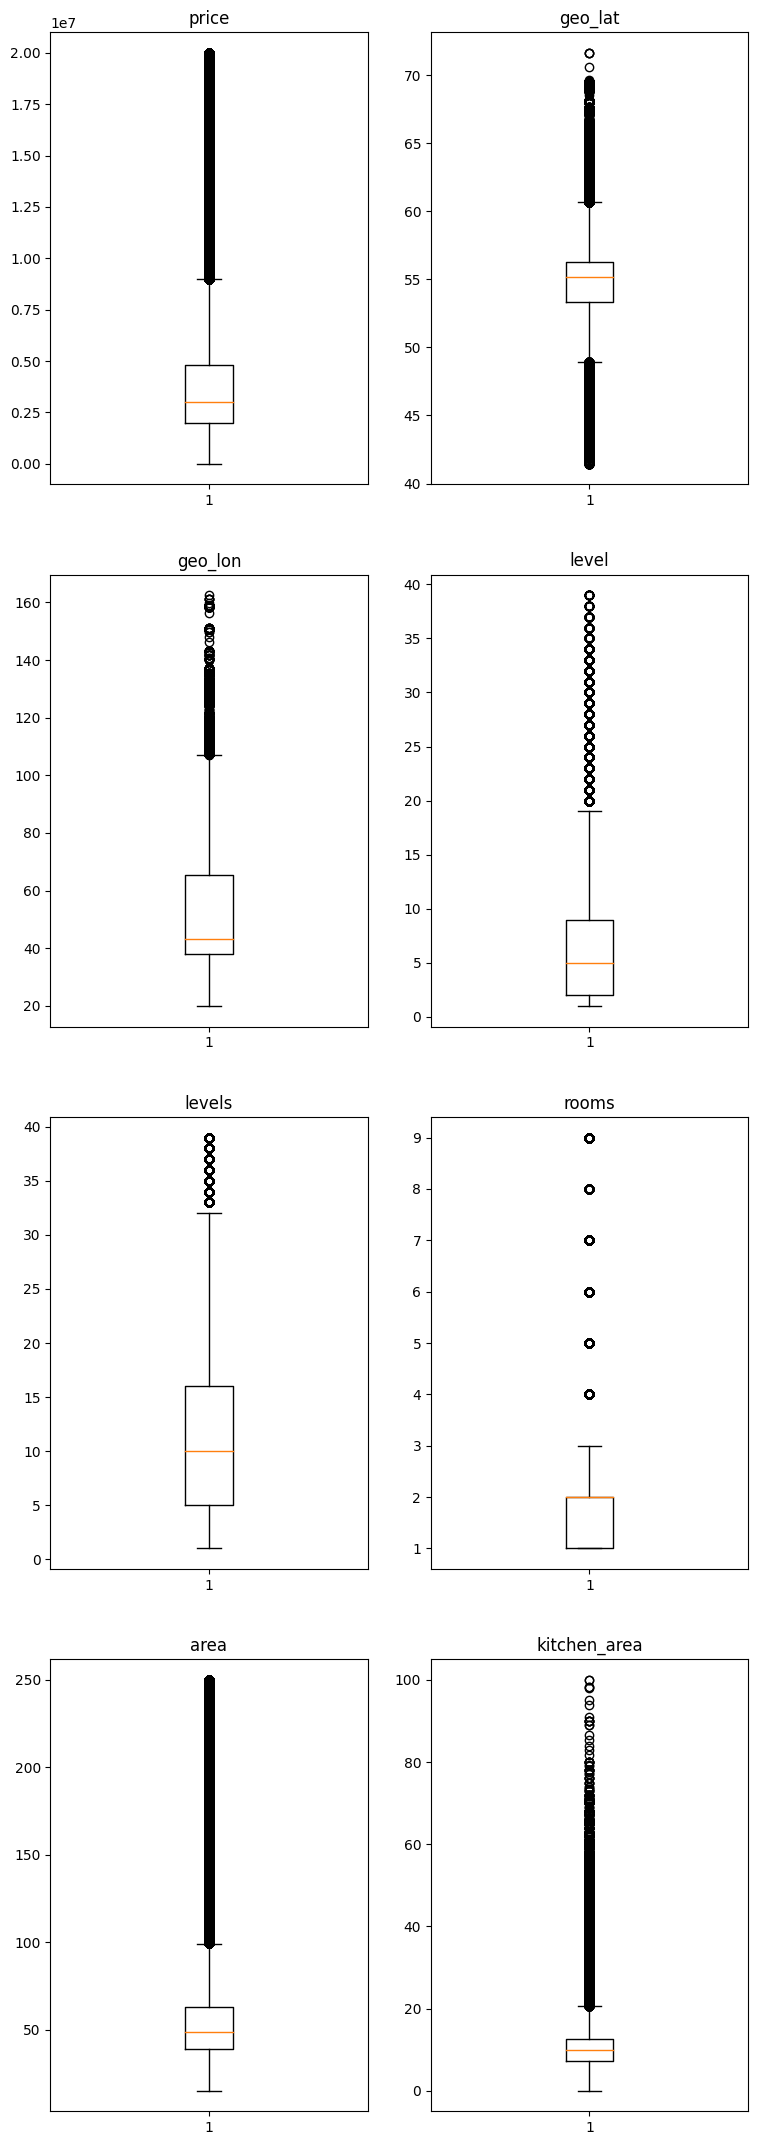

In [7]:
df = df[df["price"] < 20_000_000]                   # Убираем квартиры с ценами более 20 млн. рублей
df = df[df["price"] > 0 ]                           # Убираем квартиры с отрицательными ценами
df_studio = df[df["rooms"] <= 0 ]                   # Убираем все студии и прочее
df = df[df["rooms"] > 0 ]
df = df[df["area"] > 15 ]                           # Меньше - не квартира, а непонятно что
df = df[df["area"] <= 250 ]                         # Площадь 250 - хорошая верхняя граница
df = df[0.5 * df["area"] >= df["kitchen_area"] ]    # Квартиры, кухни которых больше 50% от общего - странные
fig, axs = plt.subplots(nrows=4, ncols=2, figsize = (9,27))
for n, col in enumerate(df[countable_cols].columns):
    axs[n//2, n%2].boxplot(df[col])
    axs[n//2, n%2].set_title(col)
plt.show()


<h2>Построим несколько графиков</h2>
Зависимость цены от площади квартиры </br>
Зависимость цены от количества комнат</br>
Зависимость цены от этажа</br>
Зависимость цены от количества этажей в доме </br>
Зависимость количества комнат от площади квартиры</br>

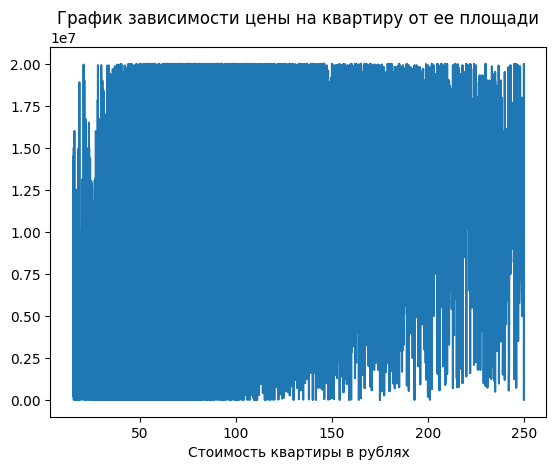

In [8]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000000
dfd = df[['price', 'area']]
dfd = dfd.sort_values('area')
plt.title("График зависимости цены на квартиру от ее площади")
plt.xlabel("Площадь квартиры в м^2")
plt.xlabel("Стоимость квартиры в рублях")
plt.plot(dfd['area'], dfd['price'])
mpl.rcParams['agg.path.chunksize'] = 0

Статистика по всей России нерепрезентативна. Я выберу Пермь

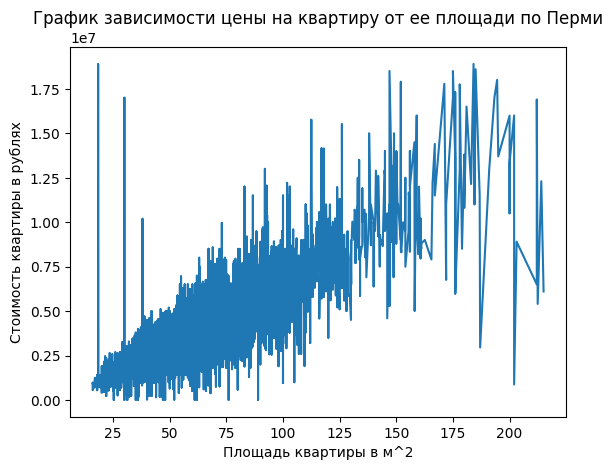

In [9]:
# Уточним данные для Пермскому краю
df_perm = df[df["geo_lat"] > 57.923799]
df_perm = df_perm[df_perm["geo_lat"] < 58.05395]
df_perm = df_perm[df_perm["geo_lon"] < 56.43334]
df_perm = df_perm[df_perm["geo_lon"] > 55.90506]
# 58.05395° 55.90506° - 57.923799° 56.43334°
dfd = df_perm[['price', 'area']]
dfd = dfd.sort_values('area')
plt.title("График зависимости цены на квартиру от ее площади по Перми")
plt.xlabel("Площадь квартиры в м^2")
plt.ylabel("Стоимость квартиры в рублях")
plt.plot(dfd['area'], dfd['price'])

Text(0, 0.5, 'Стоимость квартиры в рублях (10 млн)')

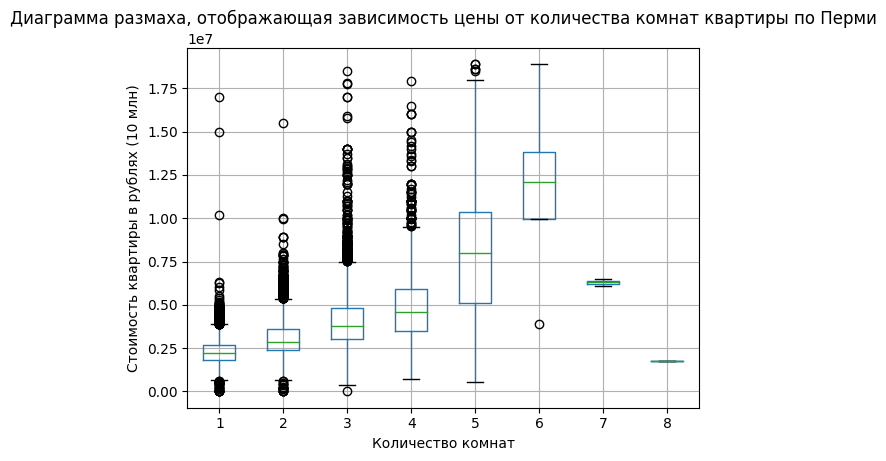

In [10]:
dfd = df_perm[['price', 'rooms']]
dfd = dfd.sort_values('rooms')
dfd.boxplot("price","rooms")
plt.suptitle("")
plt.title("Диаграмма размаха, отображающая зависимость цены от количества комнат квартиры по Перми")
plt.xlabel("Количество комнат")
plt.ylabel("Стоимость квартиры в рублях (10 млн)")

In [11]:
dfd = df_perm[['price', 'rooms', 'area', 'date', 'geo_lat', 'geo_lon']]
dfd[['price', 'rooms', 'area']].describe()

,price,rooms,area
count,3.243600e+04,32436.000000,32436.000000
mean,3.126968e+06,1.974041,52.689301
std,1.442976e+06,0.872832,19.754852
min,1.550000e+03,1.000000,16.000000
25%,2.200000e+06,1.000000,39.000000
50%,2.800000e+06,2.000000,47.100000
75%,3.666000e+06,3.000000,62.000000
max,1.890000e+07,8.000000,215.000000


Отсюда делаем выводы, что 75% всех квартир в Перми стоят от 2.2 миллиона рублей.<br>
Около половины продававшихся квартир было меньше 47.1 метров<sup>2</sup> при среднем значении 52.7 м<sup>2</sup>.<br>
Стандартное отклонение по цене равно 1.44 миллиона рублей, что сопоставимо со средним значением стоимости

In [12]:
# Обогащаем данными о расстоянии до ближайшего Ростикса
from math import sqrt
rostcs_mas =[
    (57.982673,56.200518), # Мира 20
    (57.986094, 56.255868), # Чкалова 30
    (58.00758, 56.213233),# Крисанова 12
    (58.00212, 56.30447),# Юрша 84
    (58.004254, 56.229928),# Пушкина 87
    (57.990793, 56.247639),# Куйбышева 95
    (58.007453, 56.260048),# Революции 13
    (58.008776, 56.234917),# Куйбышева 31
    (57.97296, 56.153211),# Космонавтов 162 
    (58.035996, 56.199155),# Спешилова 104
    (58.013238, 56.236392),# Компрос 15
    (57.959546, 56.133943)# Космонавтов 325
]
rost_dist = []
for i in range(len(dfd)):
    lat = dfd.iloc[i]["geo_lat"]
    lon = dfd.iloc[i]["geo_lon"]
    mindist = 100000000000000 
    for j in range(len(rostcs_mas)):
        dist = (lat - rostcs_mas[j][0]) ** 2 + (lon - rostcs_mas[j][1]) ** 2
        if dist < mindist:
            mindist = dist
    rost_dist.append(sqrt(mindist)*111134.861111)

if "rost_dist" in dfd.columns:
    dfd = dfd.drop(columns=["rost_dist"])
dfd.insert(loc = len(dfd.columns), column="rost_dist", value=rost_dist)

In [13]:
dfd["rost_dist"].describe()

count    32436.000000
mean      4293.429223
std       5881.179438
min         25.716616
25%       1050.391696
50%       1854.173950
75%       3569.074319
max      24568.886365
Name: rost_dist, dtype: float64

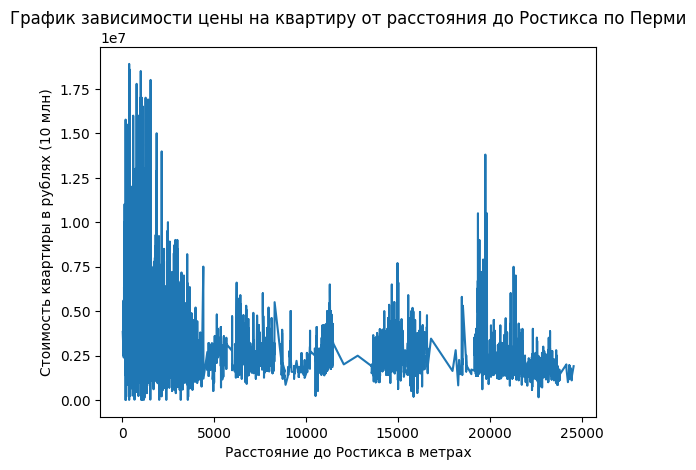

In [14]:
dfrost = dfd.sort_values("rost_dist")
plt.suptitle("")
plt.title("График зависимости цены на квартиру от расстояния до Ростикса по Перми")
plt.xlabel("Расстояние до Ростикса в метрах")
plt.ylabel("Стоимость квартиры в рублях (10 млн)")
plt.plot(dfrost["rost_dist"], dfrost['price'])

Как мы можем судить из графика, рестораны сети расположены в относительной близости от большинства квартир(75% меньше чем в 3.5 километрах, а 25% вообще меньше, чем в 1)

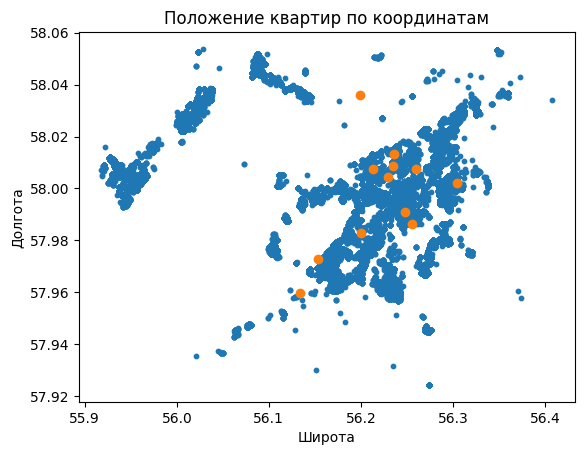

In [15]:
plt.suptitle("")
plt.title("Положение квартир по координатам")
plt.xlabel("Широта")
plt.ylabel("Долгота")
plt.scatter(dfd["geo_lon"], dfd["geo_lat"],s=10)
a = []
b = []
for i in rostcs_mas:
    a.append(i[0])
    b.append(i[1])
plt.scatter(b, a)